In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')


In [68]:


# Reconnect for reading
conn = sqlite3.connect('Inventory.db')
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
conn.close()

print(df.head())


   VendorNumber                VendorName  Brand  ActualPrice  \
0          1128         BROWN-FORMAN CORP   1233        36.99   
1          4425     MARTIGNETTI COMPANIES   3405        28.99   
2         17035         PERNOD RICARD USA   8068        24.99   
3          3960  DIAGEO NORTH AMERICA INC   4261        22.99   
4          3960  DIAGEO NORTH AMERICA INC   3545        29.99   

               Description  PurchasePrice  Volume  TotalPurchaseQuantity  \
0  Jack Daniels No 7 Black          26.27  1750.0                 145080   
1    Tito's Handmade Vodka          23.19  1750.0                 164038   
2         Absolut 80 Proof          18.24  1750.0                 187407   
3   Capt Morgan Spiced Rum          16.17  1750.0                 201682   
4          Ketel One Vodka          21.89  1750.0                 138109   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0            3811251.60            142049.0         5101919.51   
1            3804041

In [69]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10693.0,10649.892921,18752.805318,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10693.0,18037.744319,12662.525384,58.000000,5789.000000,18761.000000,25514.000000,9.063100e+04
ActualPrice,10693.0,35.640338,148.239484,0.000000,10.990000,15.990000,28.990000,7.499990e+03
PurchasePrice,10693.0,24.383023,109.264519,0.000000,6.840000,10.450000,19.470000,5.681810e+03
Volume,10693.0,847.351445,664.278813,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10693.0,3140.781539,11094.573249,1.000000,36.000000,262.000000,1978.000000,3.376600e+05
TotalPurchaseDollars,10693.0,30103.877820,123062.388765,0.000000,453.180000,3655.230000,20733.420000,3.811252e+06
TotalSalesQuantity,10693.0,3077.356308,10952.346909,0.000000,33.000000,261.000000,1929.000000,3.349390e+05
TotalSalesDollars,10693.0,42244.312108,167648.300465,0.000000,729.270000,5298.210000,28406.050000,5.101920e+06
TotalSalesPrice,10693.0,18797.686610,44952.483000,0.000000,289.710000,2857.800000,16075.380000,6.728193e+05


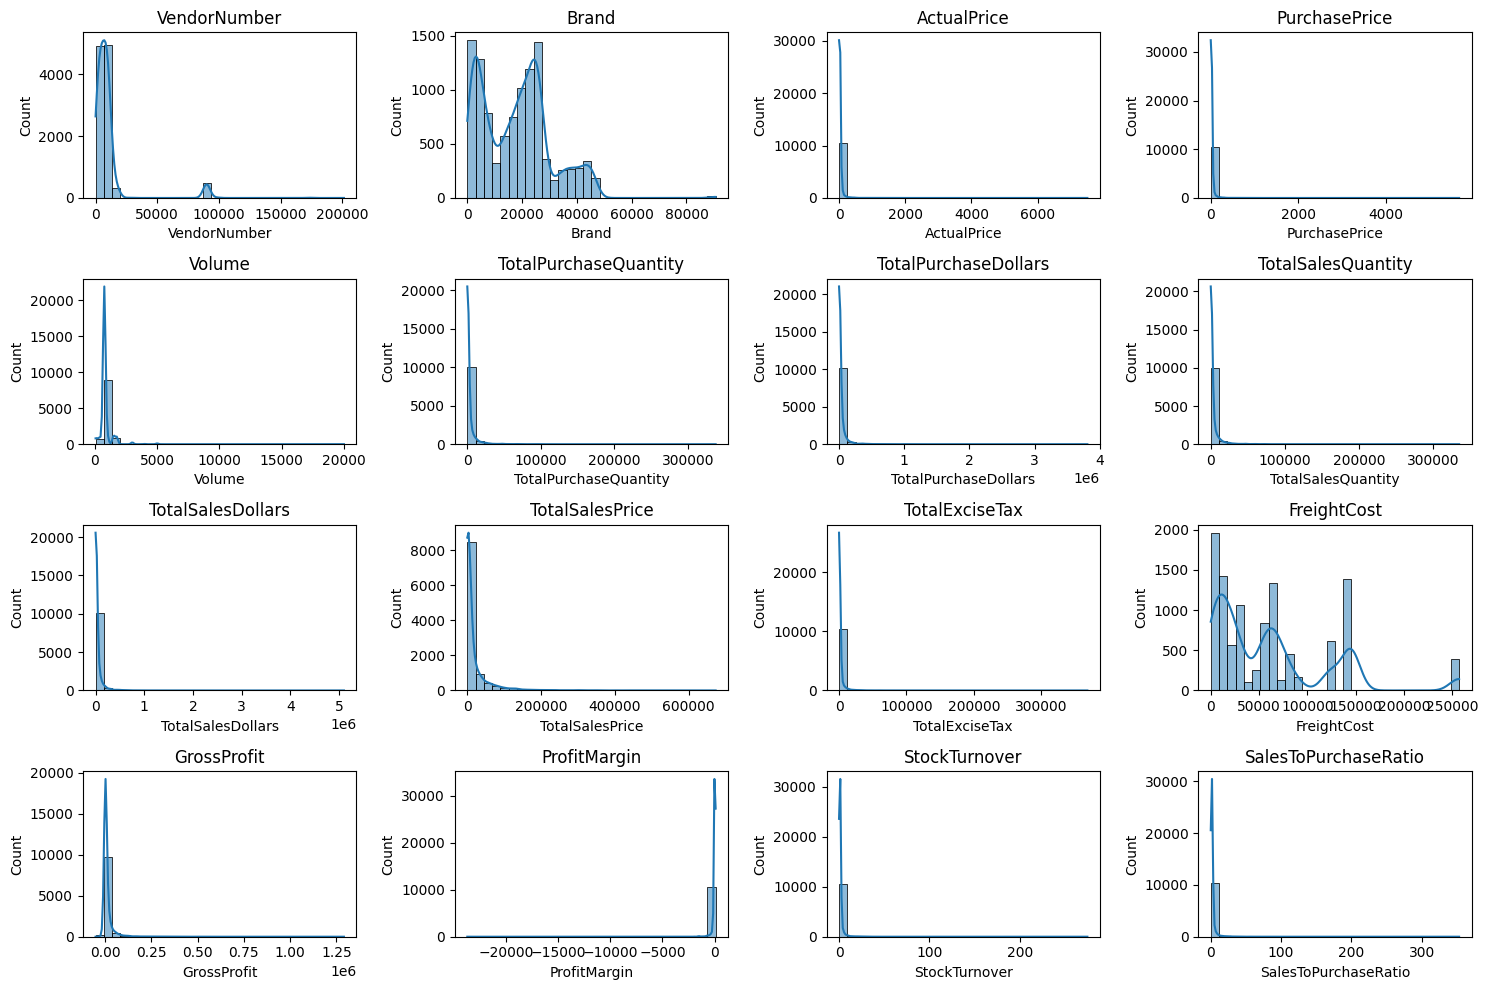

In [70]:
#Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #adjust grid layout as needed
    sns.histplot(df[col], kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

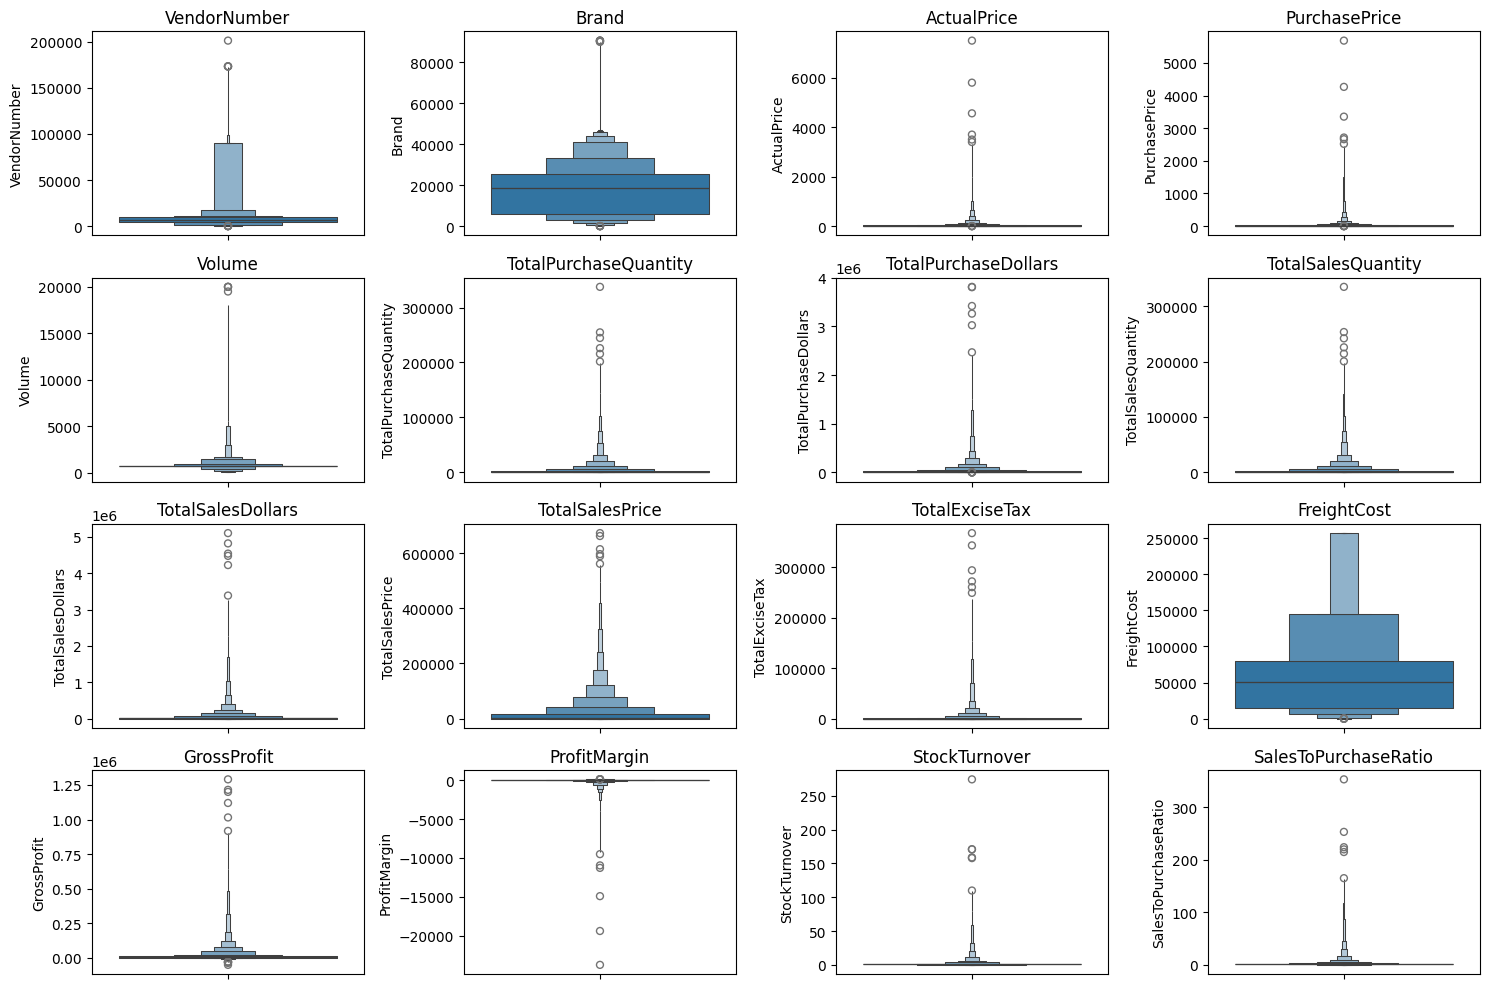

In [71]:
#outlier detection with boxplots
plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #adjust grid layout as needed
    sns.boxenplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [73]:
df

,VendorNumber,VendorName,Brand,ActualPrice,Description,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,36.99,Jack Daniels No 7 Black,26.27,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,28.99,Tito's Handmade Vodka,23.19,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,24.99,Absolut 80 Proof,18.24,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,22.99,Capt Morgan Spiced Rum,16.17,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,29.99,Ketel One Vodka,21.89,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,8004,SAZERAC CO INC,5683,0.49,Dr McGillicuddy's Apple Pie,0.39,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,0.99,Deep Eddy Vodka,0.74,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,1.99,The Club Strawbry Margarita,1.47,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
10691,7245,PROXIMO SPIRITS INC.,3065,0.99,Three Olives Grape Vodka,0.71,50.0,1,0.71,86.0,85.14,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493


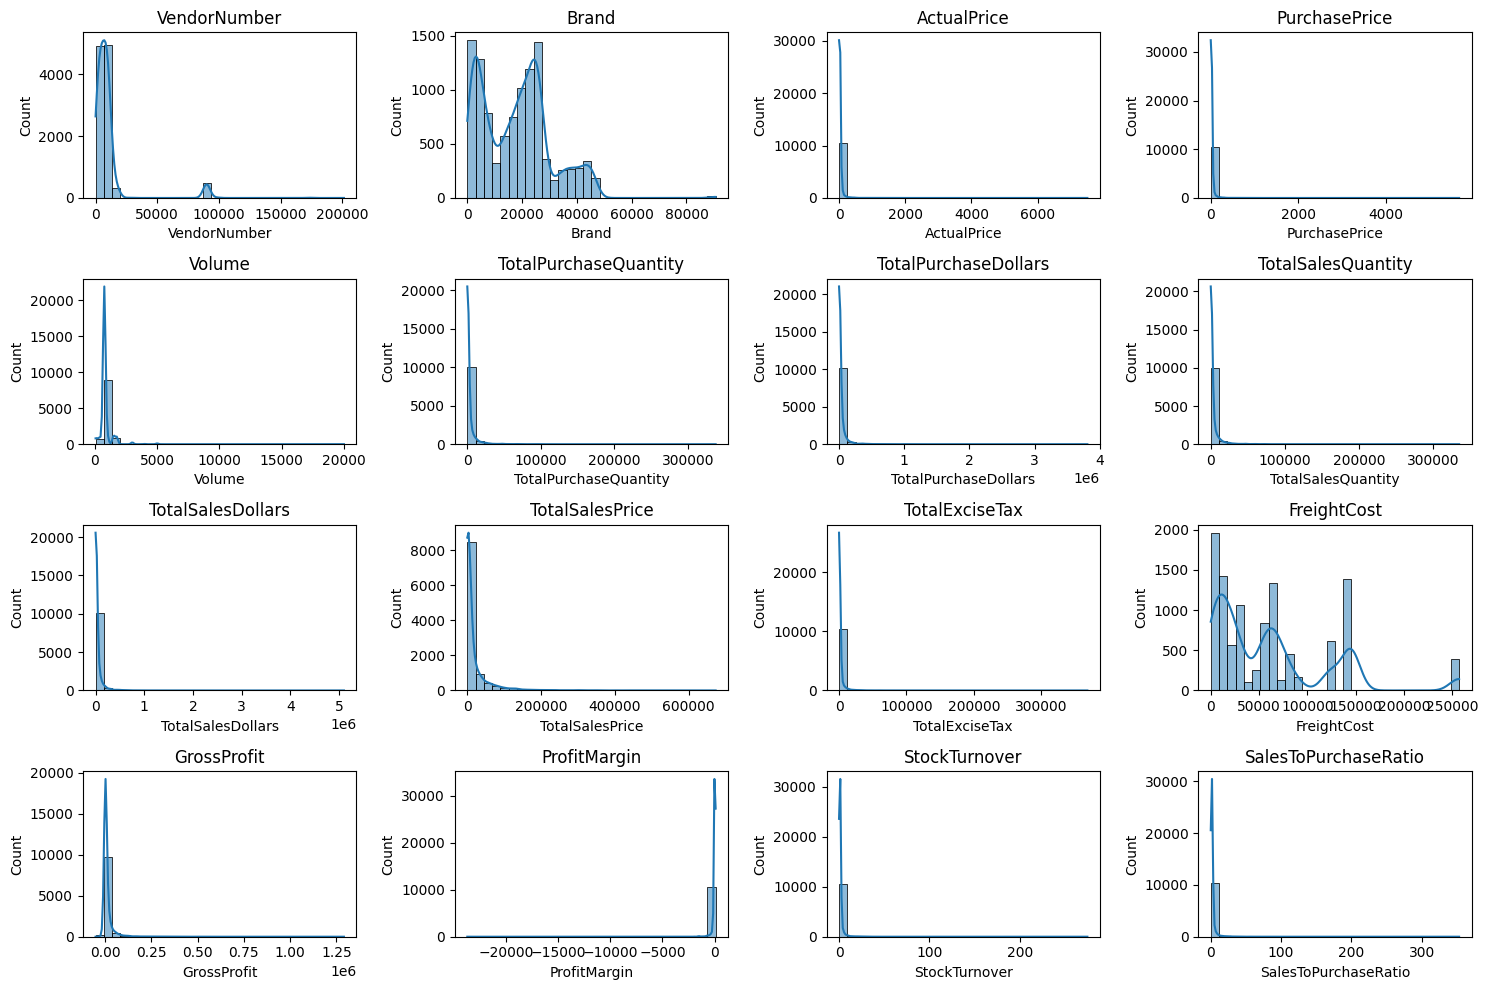

In [74]:
#Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #adjust grid layout as needed
    sns.histplot(df[col], kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

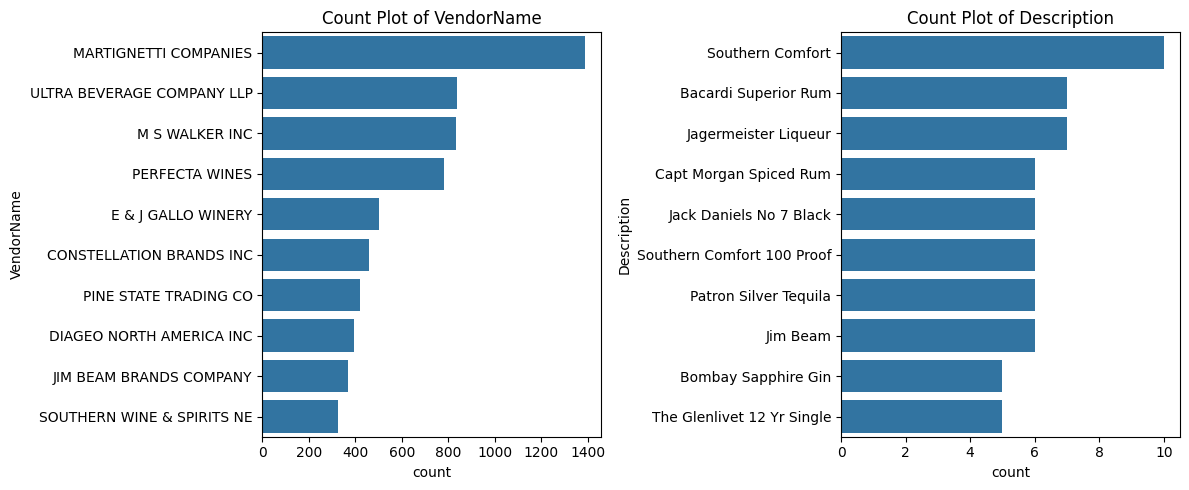

In [75]:
# Count plot for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)  # adjust grid layout as needed
    top_categories = df[col].value_counts().index[:10]  # top 10 categories
    sns.countplot(y=df[col], order=top_categories)
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()


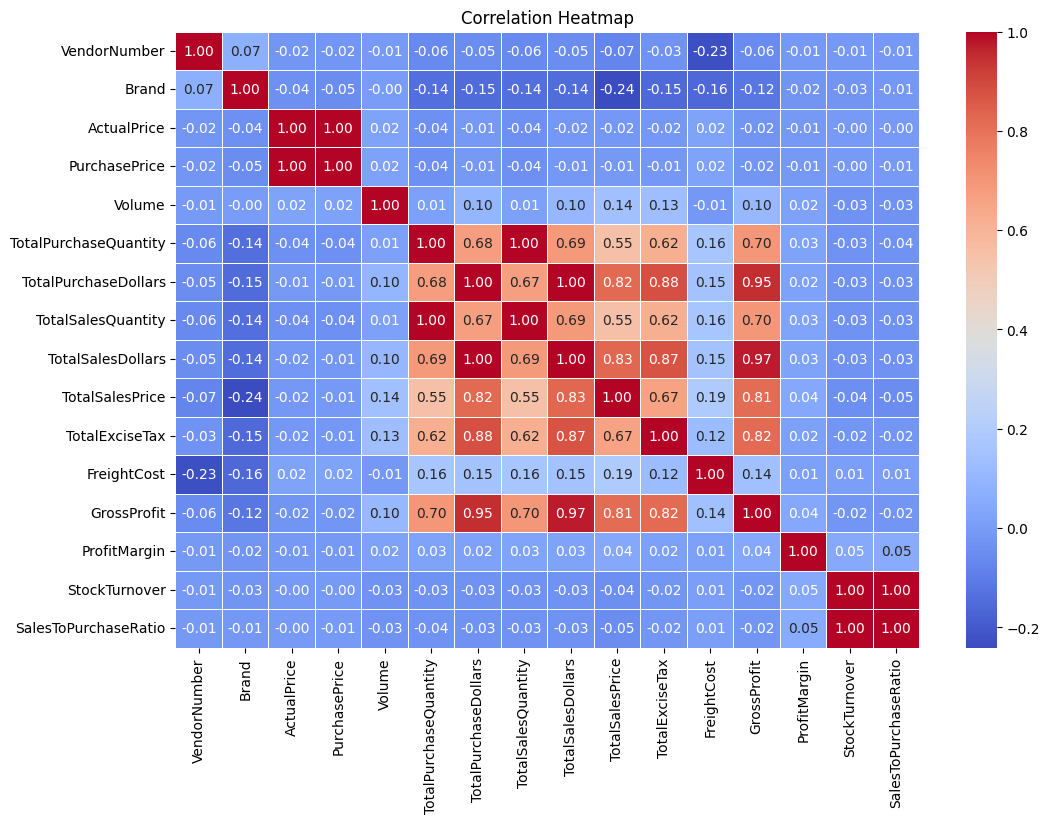

In [79]:
plt.figure(figsize=(12, 8))
correlation_matix = df[numerical_cols].corr()
sns.heatmap(correlation_matix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [80]:
df = pd.read_sql_query("select * from vendor_sales_summary", conn)


In [81]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin' : 'mean'}).reset_index()


In [82]:
df['TotalSalesDollars'] = pd.to_numeric(df['TotalSalesDollars'], errors='coerce')
df['ProfitMargin'] = pd.to_numeric(df['ProfitMargin'], errors='coerce')


In [83]:
# Calculate thresholds
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [84]:
# Filter brands
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]


In [85]:
# Keep only brands under $1000 sales
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 1000]

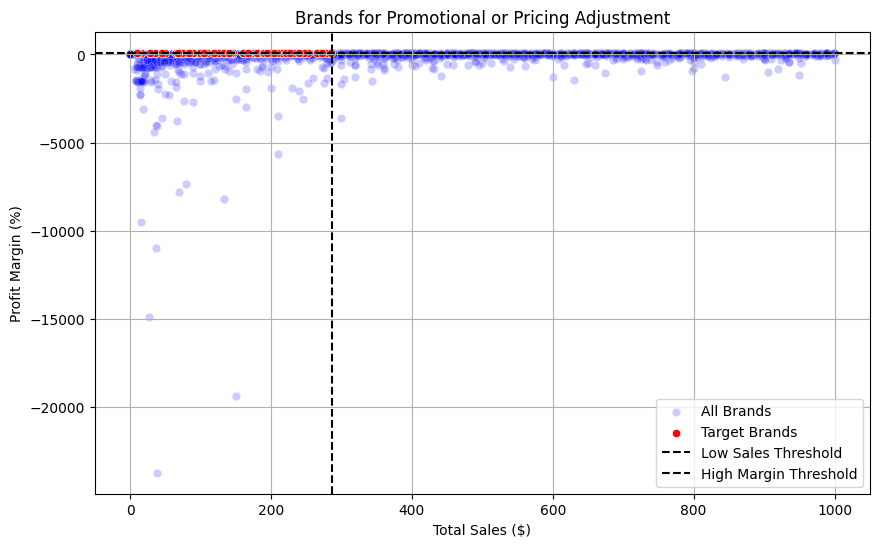

In [86]:
plt.figure(figsize=(10, 6))

# All brands in blue
sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    label="All Brands",
    alpha=0.2
)

# Target brands in red
sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="red",
    label="Target Brands"
)

# Threshold lines
plt.axvline(low_sales_threshold, linestyle='--', color="black", label="Low Sales Threshold")
plt.axhline(high_margin_threshold, linestyle='--', color="black", label="High Margin Threshold")

# Labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()


In [87]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [88]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors
top_brands 


Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

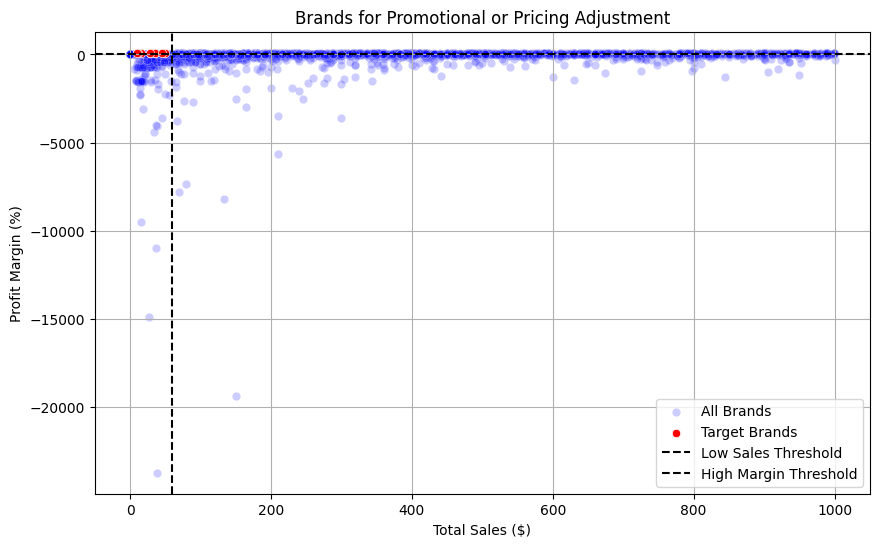

In [89]:
# Calculate thresholds
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

# Filter brands
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

# Keep only brands under $1000 sales
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 1000]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin',
                color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin',
                color="red", label="Target Brands")

plt.axvline(low_sales_threshold, linestyle='--', color="black", label="Low Sales Threshold")
plt.axhline(high_margin_threshold, linestyle='--', color="black", label="High Margin Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()


In [90]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [91]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars']

In [92]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [98]:
# Calculate on full dataset
total_purchase_dollars = df['TotalPurchaseDollars'].sum()
df['PurchaseContribution%'] = (df['TotalPurchaseDollars'] / total_purchase_dollars) * 100

# Then filter
top_vendors = df.sort_values('PurchaseContribution%', ascending=False)

# Now check
print(top_vendors['PurchaseContribution%'].sum())  # ✅ should be ≈ 100


99.99999999999999


In [99]:
#Display top 10 vendor
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] =  top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] =  top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] =  top_vendors['GrossProfit'].apply(format_dollars)
top_vendors



,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,AAPER ALCOHOL & CHEMICAL CO,105.07,-105.07,0.0,1.0
1,ADAMBA IMPORTS INTL INC,76.77K,-9194.03,67.58K,1.0
2,ALISA CARR BEVERAGES,34.95K,78.64K,113.59K,1.0
3,ALTAMAR BRANDS LLC,11.71K,4.00K,15.71K,1.0
4,AMERICAN SPIRITS EXCHANGE,1.21K,514.81,1.72K,1.0
5,AMERICAN VINTAGE BEVERAGE,156.36K,33.78K,190.13K,1.0
6,APPOLO VINEYARDS LLC,2.40K,-782.78,1.62K,1.0
7,ATLANTIC IMPORTING COMPANY,41.12K,18.16K,59.27K,1.0
8,BACARDI USA INC,17.62M,7.38M,25.01M,1.0
9,BANFI PRODUCTS CORP,1.63M,1.02M,2.65M,1.0


In [100]:
total_purchase_dollars = df['TotalPurchaseDollars'].sum()  # ✅ correct


In [101]:
top_vendors['PurchaseContribution%'].sum()

np.float64(10.0)

In [103]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
0,AAPER ALCOHOL & CHEMICAL CO,105.07,-105.07,0.0,1.0,1.0
1,ADAMBA IMPORTS INTL INC,76.77K,-9194.03,67.58K,1.0,2.0
2,ALISA CARR BEVERAGES,34.95K,78.64K,113.59K,1.0,3.0
3,ALTAMAR BRANDS LLC,11.71K,4.00K,15.71K,1.0,4.0
4,AMERICAN SPIRITS EXCHANGE,1.21K,514.81,1.72K,1.0,5.0
5,AMERICAN VINTAGE BEVERAGE,156.36K,33.78K,190.13K,1.0,6.0
6,APPOLO VINEYARDS LLC,2.40K,-782.78,1.62K,1.0,7.0
7,ATLANTIC IMPORTING COMPANY,41.12K,18.16K,59.27K,1.0,8.0
8,BACARDI USA INC,17.62M,7.38M,25.01M,1.0,9.0
9,BANFI PRODUCTS CORP,1.63M,1.02M,2.65M,1.0,10.0


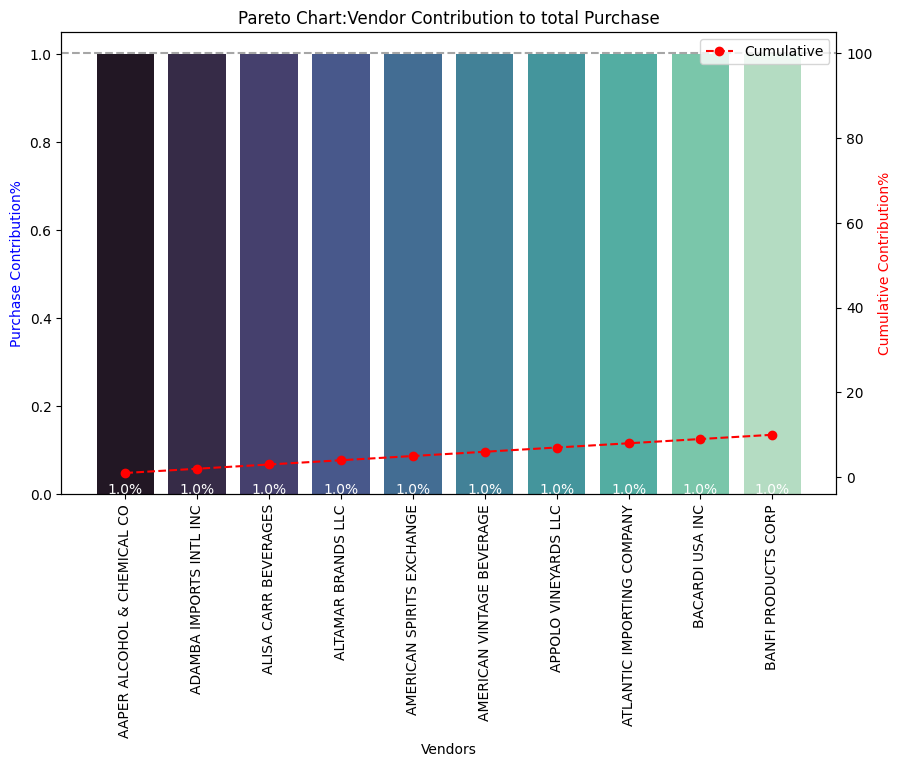

In [106]:
fig, ax1 = plt.subplots(figsize=(10, 6))
#bar plot for purchase conntribution%
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],  # corrected name
    palette="mako",
    ax=ax1
)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

#line plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution%', color='blue')
ax2.set_ylabel('Cumulative Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart:Vendor Contribution to total Purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()



In [108]:
print(f"Total Purchase Contribution of top 10 vendor is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendor is 10.0 %


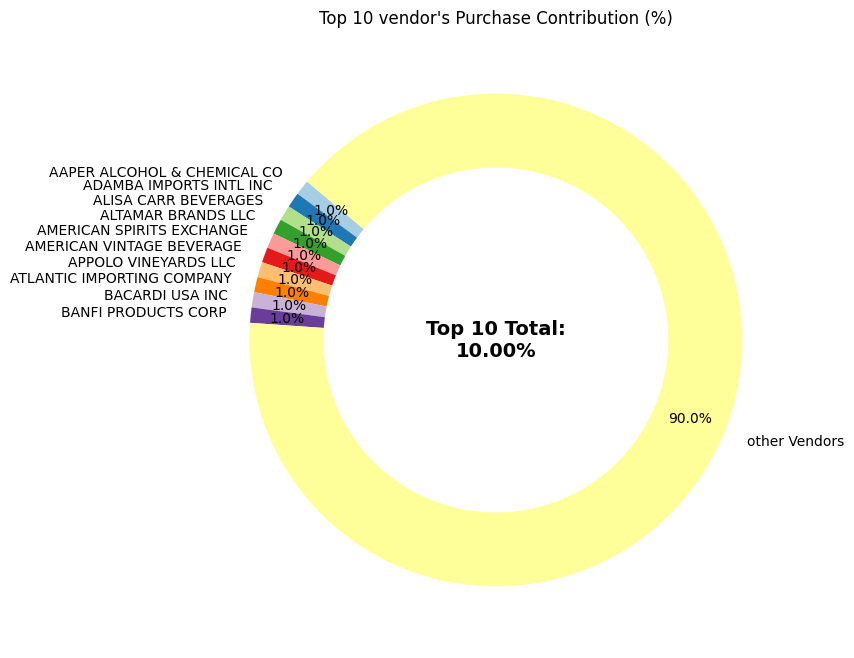

In [114]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

#append other vendors category
vendors.append("other Vendors")
purchase_contribution.append(remaining_contribution)

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a donut effect

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

#add total contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center',va='center')

plt.title("Top 10 vendor's Purchase Contribution (%)")
plt.show()

In [115]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [116]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [118]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
10688,Small,6
10689,Small,2
10690,Small,1
10691,Small,1


In [119]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,43.776954
Medium,17.894005
Large,11.305634


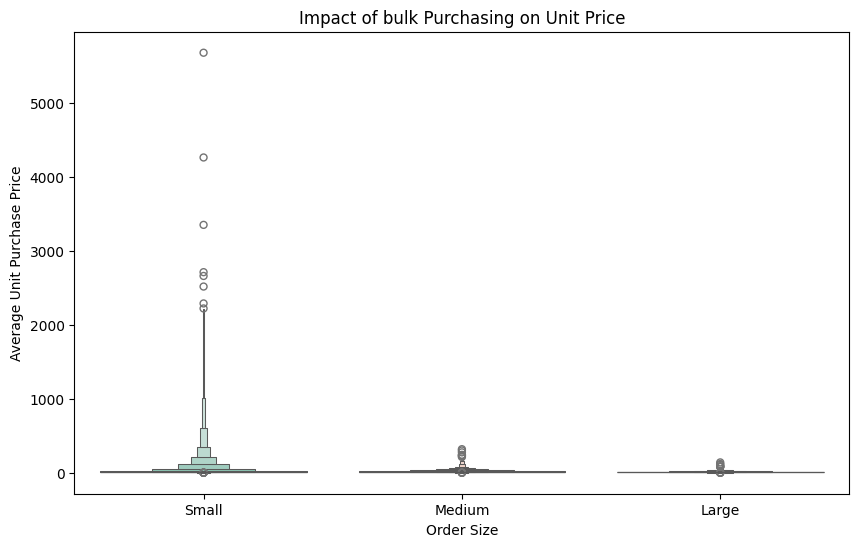

In [120]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [121]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending= True).head(10)

,StockTurnover
VendorName,
AAPER ALCOHOL & CHEMICAL CO,0.000000
LAUREATE IMPORTS CO,0.000000
TRUETT HURST,0.041667
"IRA GOLDMAN AND WILLIAMS, LLP",0.075000
HIGHLAND WINE MERCHANTS LLC,0.148920
UNCORKED,0.217238
MILTONS DISTRIBUTING CO,0.236111
VINEYARD BRANDS LLC,0.256241
LOYAL DOG WINERY,0.308333


In [123]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))


Total Unsold Capital: 8.75M


In [125]:
# Aggregate Capital Locked per vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort vendors with the highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)

# Format values
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

# Display top 10
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
28,DIAGEO NORTH AMERICA INC,980.09K
63,MARTIGNETTI COMPANIES,928.99K
50,JIM BEAM BRANDS COMPANY,857.80K
114,ULTRA BEVERAGE COMPANY LLP,780.27K
73,PERFECTA WINES,571.81K
74,PERNOD RICARD USA,554.74K
59,M S WALKER INC,469.96K
125,WILLIAM GRANT & SONS INC,436.49K
33,E & J GALLO WINERY,315.20K
14,BROWN-FORMAN CORP,284.91K


In [126]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [127]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()


In [128]:
top_vendors

0         25.297693
1         21.062810
2         24.675786
3         27.139908
4         28.412764
            ...    
5648      90.021514
5651      89.883453
5773      95.012530
5945      94.271857
10692    100.000000
Name: ProfitMargin, Length: 2674, dtype: float64

In [129]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2,df=len(data) -1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (29.55, 30.58), Mean:30.07
low Vendors 95% CI: (-165.24, -99.46), Mean:-132.35


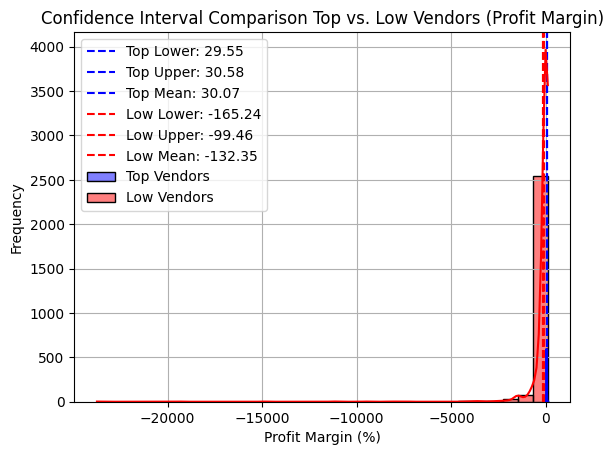

In [130]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean:{top_mean:.2f}")
print(f"low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean:{low_mean:.2f}")

#Top vendor plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

#Low vendor plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

#Finalize Plot
plt.title("Confidence Interval Comparison Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
